# Simple MNIST NN from scratch
In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.


In [6]:


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv("C:/train.csv")
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
Y_train



array([1, 1, 5, ..., 8, 9, 1], dtype=int64)

Our NN will have a simple two-layer architecture. Input layer a[0]
 will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer a[1]
 will have 10 units with ReLU activation, and finally our output layer a[2]
 will have 10 units corresponding to the ten digit classes with softmax activation.

Forward propagation

Z[1]=W[1]X+b[1]
A[1]=gReLU(Z[1]))
Z[2]=W[2]A[1]+b[2]
A[2]=gsoftmax(Z[2])
Backward propagation

dZ[2]=A[2]−Y
dW[2]=1mdZ[2]A[1]T
dB[2]=1mΣdZ[2]
dZ[1]=W[2]TdZ[2].∗g[1]′(z[1])
dW[1]=1mdZ[1]A[0]T
dB[1]=1mΣdZ[1]
Parameter updates

W[2]:=W[2]−αdW[2]
b[2]:=b[2]−αdb[2]
W[1]:=W[1]−αdW[1]
b[1]:=b[1]−αdb[1]
Vars and shapes

Forward prop

A[0]=X
: 784 x m
Z[1]∼A[1]
: 10 x m
W[1]
: 10 x 784 (as W[1]A[0]∼Z[1]
)
B[1]
: 10 x 1
Z[2]∼A[2]
: 10 x m
W[1]
: 10 x 10 (as W[2]A[1]∼Z[2]
)
B[2]
: 10 x 1
Backprop

dZ[2]
: 10 x m ( A[2]
)
dW[2]
: 10 x 10
dB[2]
: 10 x 1
dZ[1]
: 10 x m ( A[1]
)
dW[1]
: 10 x 10
dB[1]
: 10 x 1### 

In [7]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [9]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)


Iteration:  0
[0 0 4 ... 7 5 0] [1 1 5 ... 8 9 1]
0.06248780487804878
Iteration:  10
[0 0 5 ... 0 5 0] [1 1 5 ... 8 9 1]
0.1593658536585366
Iteration:  20
[0 0 5 ... 0 5 0] [1 1 5 ... 8 9 1]
0.25421951219512195
Iteration:  30
[0 9 5 ... 8 5 5] [1 1 5 ... 8 9 1]
0.3398536585365854
Iteration:  40
[8 1 5 ... 8 5 5] [1 1 5 ... 8 9 1]
0.40558536585365856
Iteration:  50
[1 1 5 ... 8 5 1] [1 1 5 ... 8 9 1]
0.46475609756097563
Iteration:  60
[1 1 5 ... 8 5 1] [1 1 5 ... 8 9 1]
0.5310731707317073
Iteration:  70
[1 1 5 ... 8 5 1] [1 1 5 ... 8 9 1]
0.5803658536585365
Iteration:  80
[1 1 5 ... 8 5 1] [1 1 5 ... 8 9 1]
0.6170975609756097
Iteration:  90
[1 1 5 ... 8 5 1] [1 1 5 ... 8 9 1]
0.6463658536585366
Iteration:  100
[1 1 5 ... 8 5 1] [1 1 5 ... 8 9 1]
0.6714878048780488
Iteration:  110
[1 1 5 ... 8 5 1] [1 1 5 ... 8 9 1]
0.6909268292682926
Iteration:  120
[1 1 5 ... 8 5 1] [1 1 5 ... 8 9 1]
0.7080731707317073
Iteration:  130
[1 1 5 ... 8 5 1] [1 1 5 ... 8 9 1]
0.7233414634146341
Iteration:  1

In [10]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


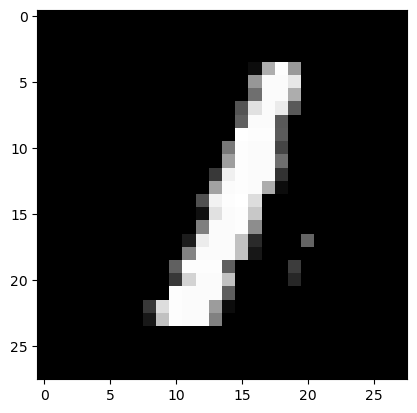

Prediction:  [1]
Label:  1


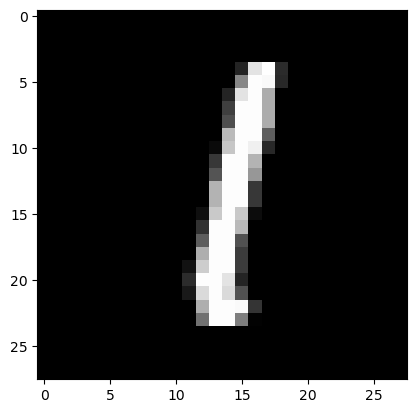

Prediction:  [5]
Label:  5


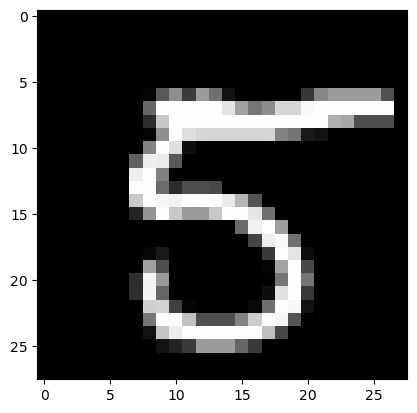

Prediction:  [4]
Label:  4


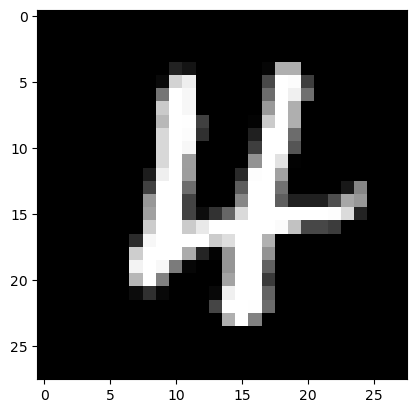

In [11]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [12]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 3 4 5 4 5 6 8 4 4 7 9 7 5 1 3 0 1 7 7 7 8 6 3 0 7 7 8 4 6 6 4 9 1 7 5 1
 6 2 4 1 4 7 9 5 1 5 8 7 1 3 4 0 4 0 6 4 7 6 3 1 7 5 5 6 1 3 4 1 2 2 4 1 1
 9 1 0 3 1 7 1 3 6 8 5 0 7 6 2 0 2 9 5 9 9 4 8 6 3 2 6 7 1 8 8 6 9 7 7 8 2
 2 6 0 2 9 7 5 7 7 2 5 8 6 5 5 4 8 1 8 2 9 0 8 8 5 0 9 3 3 0 8 1 4 5 2 9 1
 6 4 2 3 7 6 2 5 5 2 8 1 0 0 0 9 9 1 4 7 1 9 6 9 7 4 6 0 3 8 8 4 4 4 7 3 8
 1 4 0 5 3 0 5 0 3 4 7 2 8 0 0 9 1 9 8 3 2 5 9 8 6 0 9 3 3 8 3 7 0 0 5 8 5
 2 9 4 1 3 7 1 8 8 8 3 1 2 7 7 4 9 2 4 0 9 9 2 6 2 8 0 8 8 3 9 4 1 0 3 1 4
 9 0 3 4 7 1 8 6 5 5 2 6 1 9 3 2 2 5 4 3 5 6 7 4 7 2 4 6 7 0 6 1 6 3 4 8 6
 5 4 5 7 3 9 6 4 4 6 6 6 3 7 7 2 7 2 5 9 3 4 1 1 4 7 9 9 9 7 8 1 8 8 5 8 5
 8 7 2 1 8 7 4 2 7 4 7 1 2 4 9 4 7 6 2 8 9 6 3 5 1 0 1 0 3 8 3 6 0 5 3 9 4
 8 5 6 6 1 2 7 0 5 8 4 6 5 9 2 9 2 3 1 7 5 9 2 0 4 5 9 1 3 9 7 0 0 9 8 4 9
 0 5 6 5 8 2 5 6 7 2 0 0 6 4 0 3 8 9 8 8 3 8 4 9 3 0 4 7 8 2 7 2 9 0 2 4 3
 4 1 3 1 2 2 1 3 8 6 9 4 8 1 6 1 0 3 0 0 6 0 6 1 5 8 4 1 1 4 4 7 8 9 3 0 1
 0 6 8 0 1 0 4 3 1 0 9 6 

0.855